# Probability - Coin Flips and Experiments

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import seaborn as sns
sns.set(color_codes=True)
sns.set_style("white")     # See more styling options here: https://seaborn.pydata.org/tutorial/aesthetics.html

In [4]:
np.random.uniform(low=0.0, high=1.0)

0.5627779548555045

In [31]:
# generate a 'flip'
def flip(num = 1):
    flips = []

    for i in range(num):
        num = np.random.uniform(low=0.0, high=1.0)
        if num > 0.75:
            flips.append('H')             # should be doing yield here if you know 'generators'
        else:
            flips.append('T')
    return flips

In [32]:
flip()

['H']

In [33]:
flips = flip(10)
print(flips)

['T', 'T', 'H', 'T', 'T', 'T', 'H', 'H', 'H', 'H']


In [34]:
values, counts = np.unique(flips, return_counts=True)

In [35]:
values, counts

(array(['H', 'T'], dtype='<U1'), array([5, 5]))

## Repdoducible 'Randomness'

In [36]:
# computers are 'deterministic'. You can not do 'random' in computers!
# So, you start with some 'seed' then do deterministic things
# this is called pseudo-randomness

# sometimes you want to suppress this!

np.random.seed(0)   # random numbers and seed

In [37]:
np.random.uniform(low=0.0, high=1.0)

0.5488135039273248

In [39]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import seaborn as sns
sns.set(color_codes=True)
sns.set_style("white")     # See more styling options here: https://seaborn.pydata.org/tutorial/aesthetics.html


np.random.seed(0)   # random numbers and seed


# generate a 'flip'
def flip(num = 1):
    flips = []

    for i in range(num):
        num = np.random.uniform(low=0.0, high=1.0)
        if num > 0.75:
            flips.append('H')             # should be doing yield here if you know 'generators'
        else:
            flips.append('T')
    return flips


# Flip
flips = flip(10)
values, counts = np.unique(flips, return_counts=True)

# print values/stats
# print(flip())
print(flips)
print(values, counts)

['T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'H', 'T']
['H' 'T'] [2 8]


## Probability of Flips

In [47]:
from collections import Counter, defaultdict


def get_freqs(flips):
    keys = Counter(flips).keys()
    vals = Counter(flips).values()

    # print(keys)
    # print(vals)

    #return dict(zip(keys, vals))     # bug: what if there are no 'H' or no 'T'

    return defaultdict(int, dict(zip(keys, vals)))

In [48]:
freqs = get_freqs(flips)
print(freqs)

defaultdict(<class 'int'>, {'T': 8, 'H': 2})


In [49]:
prob_h = freqs['H'] / len(flips)
print(prob_h)

0.2


## Experiment: Prob calculated based on 1 flip upto N flips

In [50]:
maximum_flips = 1000

probs = []
for num_flips in range(1, maximum_flips):
    flips = flip(num_flips)
    freqs = get_freqs(flips)
    prob_h = freqs['H'] / len(flips)

    probs.append(prob_h)

# print(probs)

In [51]:
print(freqs)

defaultdict(<class 'int'>, {'T': 743, 'H': 256})


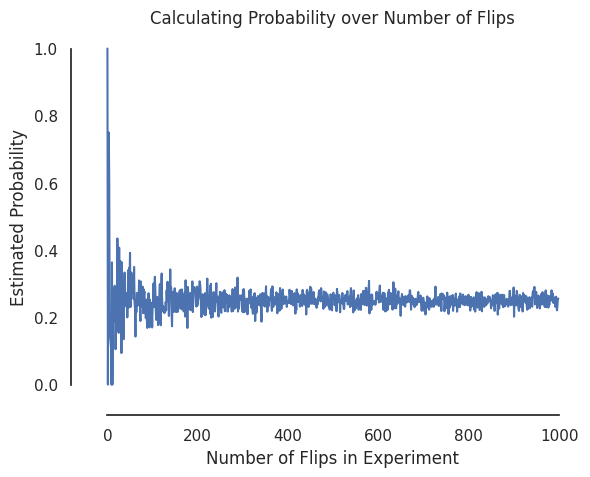

In [52]:
plt.plot(probs)
plt.ylabel('Estimated Probability')
plt.xlabel('Number of Flips in Experiment');
plt.title("Calculating Probability over Number of Flips")
sns.despine(offset=10, trim=True);  # move axes away
plt.show()

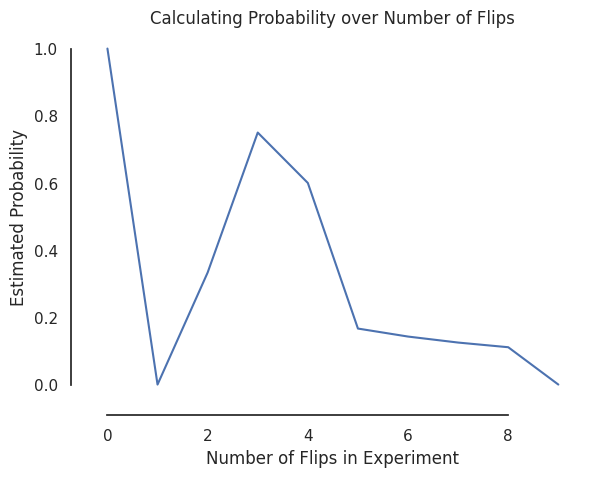

In [53]:
plt.plot(probs[:10])
plt.ylabel('Estimated Probability')
plt.xlabel('Number of Flips in Experiment');
plt.title("Calculating Probability over Number of Flips")
sns.despine(offset=10, trim=True);  # move axes away
plt.show()

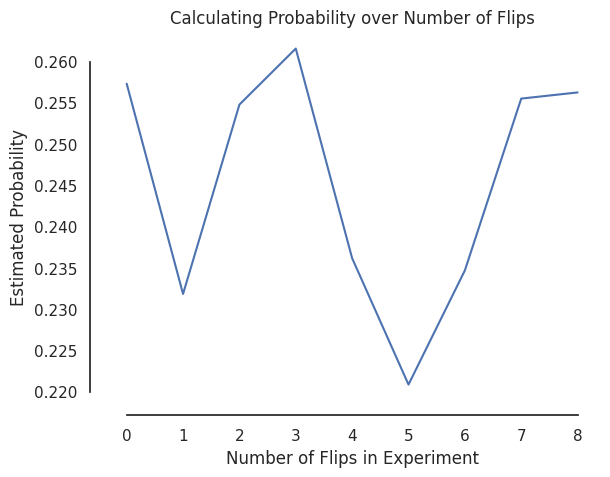

In [54]:
plt.plot(probs[maximum_flips-10:])
plt.ylabel('Estimated Probability')
plt.xlabel('Number of Flips in Experiment');
plt.title("Calculating Probability over Number of Flips")
sns.despine(offset=10, trim=True);  # move axes away
plt.show()

## Bokeh For Interactive Plots

In [55]:
!pip install bokeh

In [56]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()

In [58]:
p = figure(title="Simple Line Plot in Bokeh",
           x_axis_label='Number of Flips in Experiment',
           y_axis_label='Estimated Probability',
           width=580, height=380)

In [61]:
maximum_flips = 1000
x = np.arange(1, maximum_flips + 1)
probs = np.random.random(size=maximum_flips)

# Create a new plot
p = figure(title="Simple Line Plot in Bokeh",
           x_axis_label='Number of Flips in Experiment',
           y_axis_label='Estimated Probability',
           width=580, height=380)


p.line(x=x, y=probs, legend_label="Probability", line_width=2)

# Show the results
show(p)
